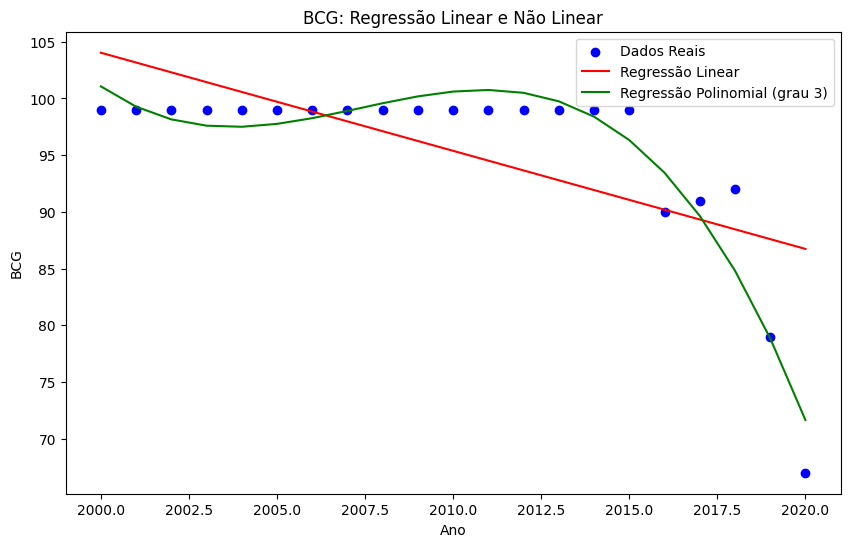

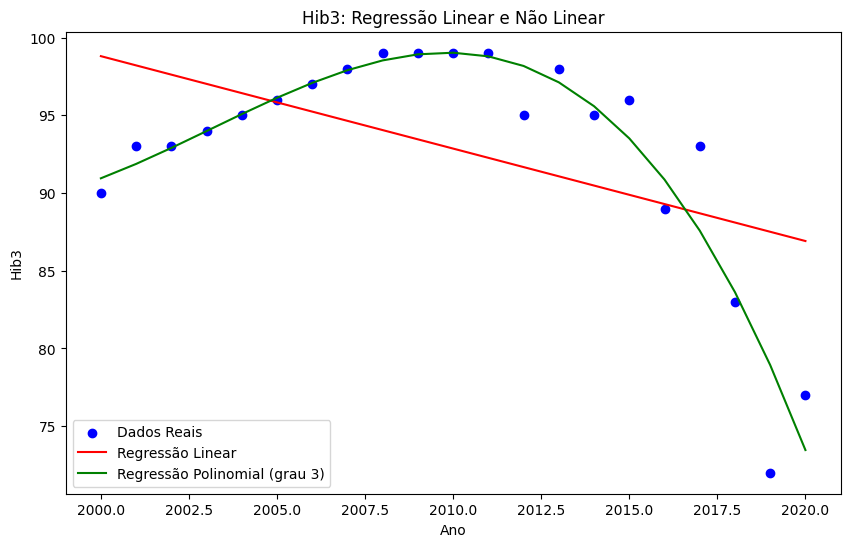

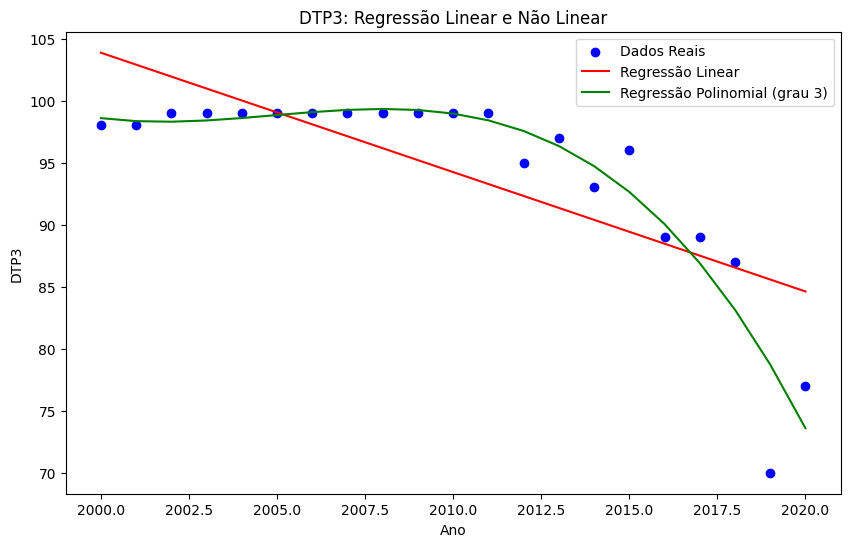

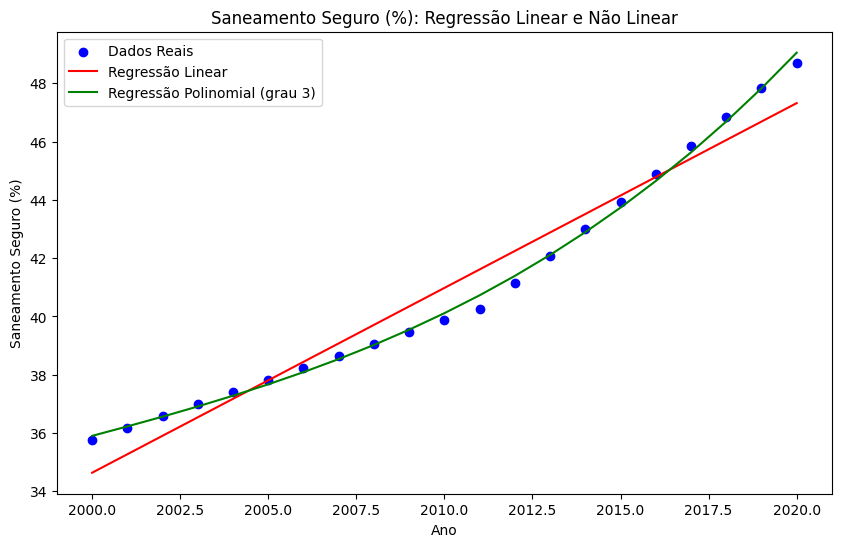

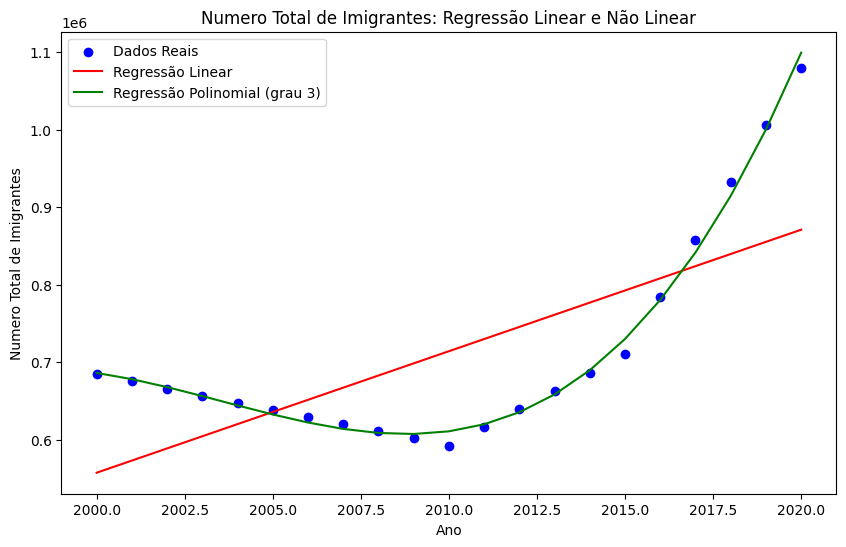

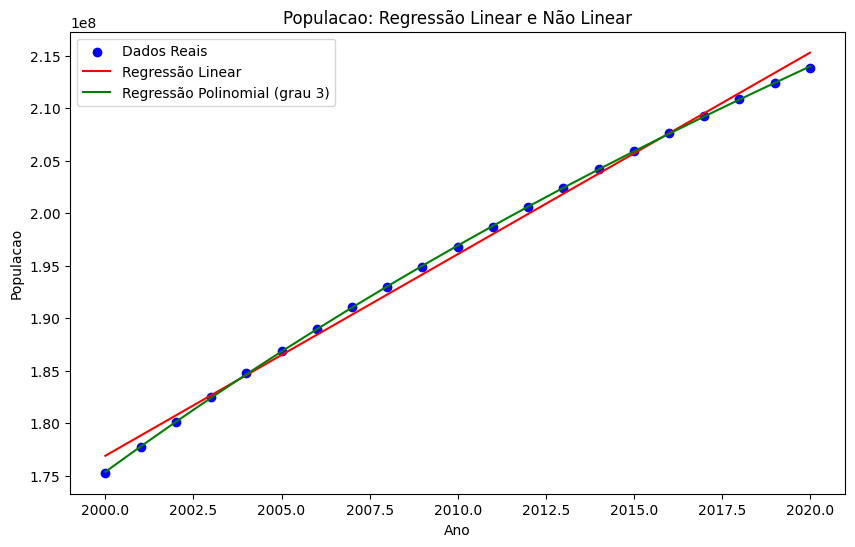

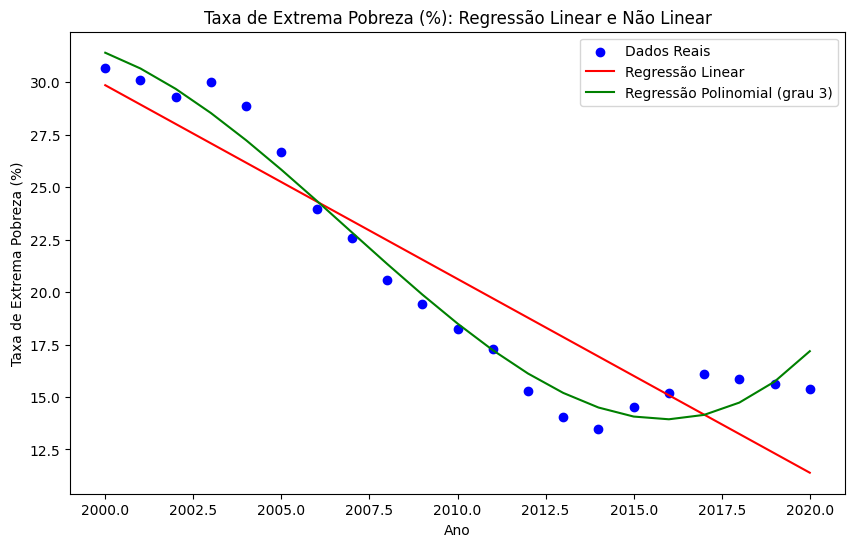

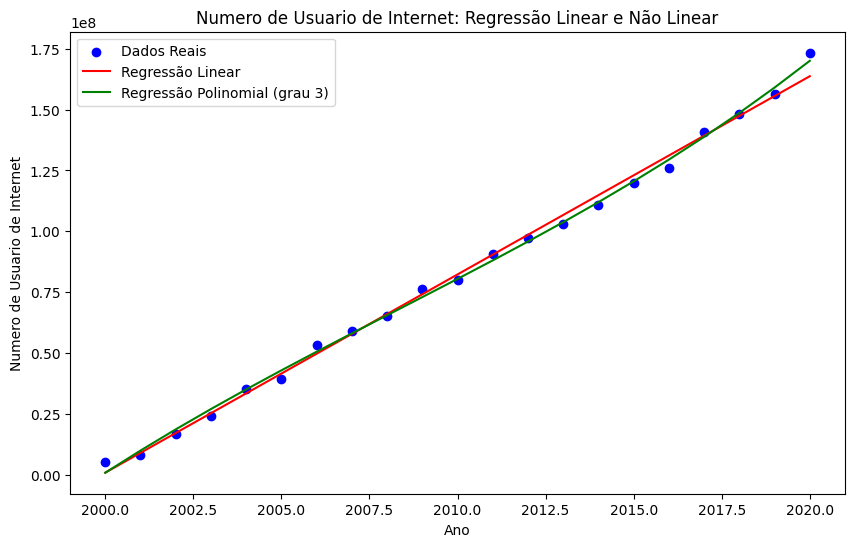

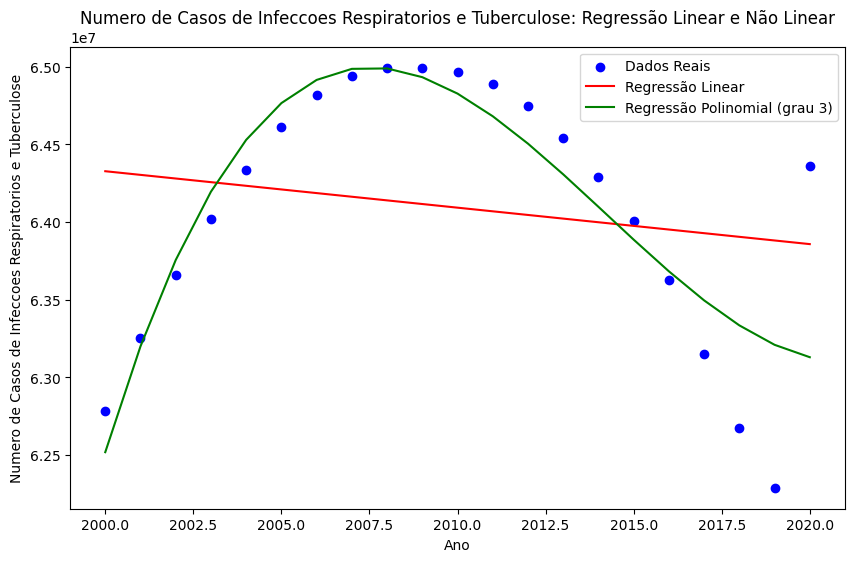


BCG:
Erro Quadrado Médio (Linear): 36.51931560502992
Erro Quadrado Médio (Polinomial): 5.52052320272822
R2 Score (Linear): 0.42894056514367085
R2 Score (Polinomial): 0.9136745361178943

Hib3:
Erro Quadrado Médio (Linear): 37.626221397650184
Erro Quadrado Médio (Polinomial): 5.410092685322603
R2 Score (Linear): 0.2563787919528667
R2 Score (Polinomial): 0.8930782972919571

DTP3:
Erro Quadrado Médio (Linear): 26.034157905586476
Erro Quadrado Médio (Polinomial): 6.256335583602881
R2 Score (Linear): 0.5660317645765182
R2 Score (Polinomial): 0.8957119748877809

Saneamento Seguro (%):
Erro Quadrado Médio (Linear): 0.6467799889896645
Erro Quadrado Médio (Polinomial): 0.03613418620719962
R2 Score (Linear): 0.9579944580677398
R2 Score (Polinomial): 0.9976532420610513

Numero Total de Imigrantes:
Erro Quadrado Médio (Linear): 9203204607.36015
Erro Quadrado Médio (Polinomial): 93957408.63083161
R2 Score (Linear): 0.49451699628557255
R2 Score (Polinomial): 0.9948394200539719

Populacao:
Erro Quadr

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Dados
data = {
    'Ano': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "BCG": [99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 90, 91, 92, 79, 67],
    "Hib3": [90, 93, 93, 94, 95, 96, 97, 98, 99, 99, 99, 99, 95, 98, 95, 96, 89, 93, 83, 72, 77],
    "DTP3": [98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 95, 97, 93, 96, 89, 89, 87, 70, 77],
    "Saneamento Seguro (%)": [35.742043, 36.167625, 36.5859, 37.002148, 37.416237, 37.828217, 
                              38.23828, 38.64647, 39.05281, 39.457043, 39.859512, 40.261555, 
                              41.154324, 42.062695, 42.98721, 43.927658, 44.883984, 45.85642, 
                              46.84473, 47.84931, 48.706318],
    "Numero Total de Imigrantes": [684596, 675393, 666190, 656988, 647785, 638582, 629394, 
                                   620205, 611017, 601828, 592640, 616173, 639706, 663238, 
                                   686771, 710304, 784185, 858066, 931946, 1005827, 1079708],
    "Populacao": [175287587, 177750670, 180151021, 182482149, 184738458, 186917361, 189012412, 
                  191026637, 192979029, 194895996, 196796269, 198686688, 200560983, 202408632, 
                  204213133, 205962108, 207652865, 209288278, 210867954, 212392717, 213863046],
    "Taxa de Extrema Pobreza (%)": [30.67, 30.13, 29.28, 30.0, 28.86, 26.69, 23.94, 22.56, 20.57, 
                                    19.44, 18.25, 17.28, 15.28, 14.06, 13.47, 14.53, 15.18, 16.09, 
                                    15.88, 15.63, 15.36],
    "Numero de Usuario de Internet": [5048780, 8070316, 16512580, 24120920, 35233276, 39269933, 
                                      53206613, 58912694, 65181049, 76289786, 79817702, 90550859, 
                                      97109180, 102958796, 110989278, 119682082, 125920682, 140680972, 
                                      148029327, 156533889, 173419624],
    "Numero de Casos de Infeccoes Respiratorios e Tuberculose": [62784899, 63249957, 63660428, 64020301, 
                                                                 64334928, 64610502, 64820118, 64941261, 
                                                                 64992516, 64994141, 64965154, 64889004, 
                                                                 64744480, 64542620, 64291488, 64004934, 
                                                                 63626040, 63150966, 62673404, 62288579, 64359713]
}

df = pd.DataFrame(data)

# Definindo as variáveis X (Ano) e Y (BCG, Hib3, DTP3, etc.)
X = df[['Ano']].values  # variável independente (Ano)
Y = df[['BCG', 'Hib3', 'DTP3', 'Saneamento Seguro (%)', 'Numero Total de Imigrantes', 
        'Populacao', 'Taxa de Extrema Pobreza (%)', 'Numero de Usuario de Internet', 
        'Numero de Casos de Infeccoes Respiratorios e Tuberculose']].values

# Regressão Linear
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred_linear = linear_regressor.predict(X)

# Regressão Não-Linear (Polinomial de grau 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, Y)
Y_pred_poly = poly_regressor.predict(X_poly)

# Resultados
for i, col in enumerate(df.columns[1:]):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Ano'], df[col], color='blue', label='Dados Reais')
    plt.plot(df['Ano'], Y_pred_linear[:, i], color='red', label='Regressão Linear')
    plt.plot(df['Ano'], Y_pred_poly[:, i], color='green', label='Regressão Polinomial (grau 3)')
    plt.title(f'{col}: Regressão Linear e Não Linear')
    plt.xlabel('Ano')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# Métricas de desempenho
for i, col in enumerate(df.columns[1:]):
    print(f"\n{col}:")
    print(f"Erro Quadrado Médio (Linear): {mean_squared_error(Y[:, i], Y_pred_linear[:, i])}")
    print(f"Erro Quadrado Médio (Polinomial): {mean_squared_error(Y[:, i], Y_pred_poly[:, i])}")
    print(f"R2 Score (Linear): {r2_score(Y[:, i], Y_pred_linear[:, i])}")
    print(f"R2 Score (Polinomial): {r2_score(Y[:, i], Y_pred_poly[:, i])}")
